In [2]:
import mlflow
import os
os.environ["MLFLOW_TRACKING_URI"] = "databricks"
os.environ["DATABRICKS_HOST"] = ""
os.environ["DATABRICKS_TOKEN"] = ""
mlflow.set_registry_uri("databricks")
mlflow.sklearn.autolog(registered_model_name="California Housing")

In [3]:
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
cal_housing = fetch_california_housing()
 
# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2)
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
mlflow.set_experiment("/Users/gteicom@hotmail.com/California Housing")
# With autolog() enabled, all model parameters, a model score, and the fitted model are automatically logged.  
with mlflow.start_run():
  
  # Set the model parameters. 
  n_estimators = 100
  max_depth = 6
  max_features = 3
  
  # Create and train model.
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)
  
  # Use the model to make predictions on the test dataset.
  predictions = rf.predict(X_test) 
  

2023/08/03 16:44:50 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/teixeira/code/playground/mlflow-exploration/.venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."
Registered model 'California Housing' already exists. Creating a new version of this model...
2023/08/03 16:44:54 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: California Housing, version 19
Created version '19' of model 'California Housing'.


In [6]:
with mlflow.start_run():
  
  # Set the model parameters. 
  n_estimators = 100
  max_depth = 6
  max_features = 3
  
  # Create and train model.
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)
  
  # Use the model to make predictions on the test dataset.
  predictions = rf.predict(X_test) 


Registered model 'California Housing' already exists. Creating a new version of this model...
2023/08/03 16:45:09 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: California Housing, version 20
Created version '20' of model 'California Housing'.


In [7]:
from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK
from hyperopt.pyll.base import scope
 
search_space = {
  'max_depth': scope.int(hp.quniform('max_depth', 2, 10, 1)),
  'n_estimators': scope.int(hp.quniform('n_estimators', 200, 1000, 100)),
  'max_features': scope.int(hp.quniform('max_features', 3, 8, 1)),
}
 
def train_model(params):
   
  # Create and train model.
  rf = RandomForestRegressor(random_state=0, **params)
  rf.fit(X_train, y_train)
  
  predictions = rf.predict(X_test)
  
  # Evaluate the model
  mse = mean_squared_error(y_test, predictions)
  
  return {"loss": mse, "status": STATUS_OK}
  
  
# spark_trials = SparkTrials()
trials = Trials()
with mlflow.start_run() as run:
  best_params = fmin(
    fn=train_model, 
    space=search_space, 
    algo=tpe.suggest, 
    max_evals=8,
    trials=trials)


  0%|          | 0/8 [00:00<?, ?trial/s, best loss=?]

Registered model 'California Housing' already exists. Creating a new version of this model...
2023/08/03 16:46:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: California Housing, version 21

Created version '21' of model 'California Housing'.


 12%|█▎        | 1/8 [01:04<07:29, 64.27s/trial, best loss: 0.35938660114896603]

Registered model 'California Housing' already exists. Creating a new version of this model...
2023/08/03 16:46:42 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: California Housing, version 22

Created version '22' of model 'California Housing'.
2023/08/03 16:46:53 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID 72243d7146dd4127a7c6948be05306e0. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key max_depth was already logged with a value of 8. The attempted new value was 9')]")]



 25%|██▌       | 2/8 [01:35<04:28, 44.68s/trial, best loss: 0.3284135175642556] 

Registered model 'California Housing' already exists. Creating a new version of this model...
2023/08/03 16:47:03 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: California Housing, version 23

Created version '23' of model 'California Housing'.
2023/08/03 16:47:09 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID 72243d7146dd4127a7c6948be05306e0. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key max_depth was already logged with a value of 8. The attempted new value was 2')]")]



 38%|███▊      | 3/8 [01:52<02:40, 32.01s/trial, best loss: 0.3284135175642556]

Registered model 'California Housing' already exists. Creating a new version of this model...
2023/08/03 16:47:25 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: California Housing, version 24

Created version '24' of model 'California Housing'.
2023/08/03 16:47:32 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID 72243d7146dd4127a7c6948be05306e0. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key max_depth was already logged with a value of 8. The attempted new value was 6')]")]



 50%|█████     | 4/8 [02:14<01:52, 28.13s/trial, best loss: 0.3284135175642556]

Registered model 'California Housing' already exists. Creating a new version of this model...
2023/08/03 16:47:46 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: California Housing, version 25

Created version '25' of model 'California Housing'.
2023/08/03 16:47:53 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID 72243d7146dd4127a7c6948be05306e0. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key max_depth was already logged with a value of 8. The attempted new value was 3')]")]



 62%|██████▎   | 5/8 [02:35<01:16, 25.57s/trial, best loss: 0.3284135175642556]

Registered model 'California Housing' already exists. Creating a new version of this model...
2023/08/03 16:48:14 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: California Housing, version 26

Created version '26' of model 'California Housing'.
2023/08/03 16:48:21 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID 72243d7146dd4127a7c6948be05306e0. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key max_depth was already logged with a value of 8. The attempted new value was 7')]")]



 75%|███████▌  | 6/8 [03:03<00:52, 26.42s/trial, best loss: 0.3284135175642556]

Registered model 'California Housing' already exists. Creating a new version of this model...
2023/08/03 16:48:44 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: California Housing, version 27

Created version '27' of model 'California Housing'.
2023/08/03 16:48:51 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID 72243d7146dd4127a7c6948be05306e0. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key max_depth was already logged with a value of 8. The attempted new value was 7')]")]



 88%|████████▊ | 7/8 [03:33<00:27, 27.70s/trial, best loss: 0.3284135175642556]

Registered model 'California Housing' already exists. Creating a new version of this model...
2023/08/03 16:49:25 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: California Housing, version 28

Created version '28' of model 'California Housing'.
2023/08/03 16:49:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID 72243d7146dd4127a7c6948be05306e0. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key max_depth was already logged with a value of 8. The attempted new value was 7')]")]



100%|██████████| 8/8 [04:18<00:00, 32.29s/trial, best loss: 0.3284135175642556]


In [8]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=cal_housing.feature_names, columns=['importance'])
feature_importances.sort_values('importance', ascending=False)

import hyperopt
 
print(hyperopt.space_eval(search_space, best_params))
max_depth = int(hyperopt.space_eval(search_space, best_params)["max_depth"])
max_features = int(hyperopt.space_eval(search_space, best_params)["max_features"])
n_estimators = int(hyperopt.space_eval(search_space, best_params)["n_estimators"]) 
X_all_train = scaler.fit_transform(cal_housing.data)
y_all_train = cal_housing.target


{'max_depth': 9, 'max_features': 7, 'n_estimators': 300}


Registered model 'California Housing' already exists. Creating a new version of this model...
2023/08/03 16:50:05 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: California Housing, version 29
Created version '29' of model 'California Housing'.


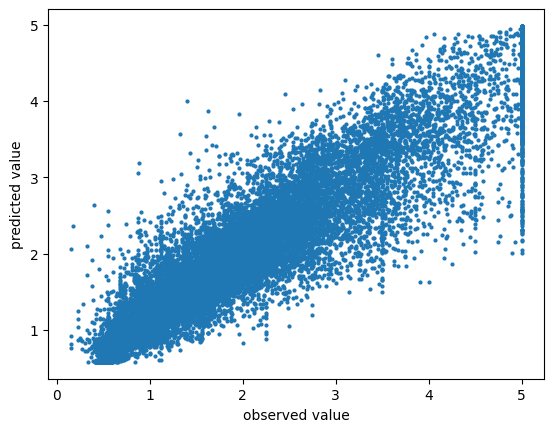

In [9]:
with mlflow.start_run() as run:
  
  rf_new = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf_new.fit(X_all_train, y_all_train)
  
  # Save the run information to register the model later
  rf_uri = run.info.artifact_uri
  
  # Plot predicted vs known values for a quick visual check of the model and log the plot as an artifact
  rf_pred = rf_new.predict(X_all_train)
  plt.plot(y_all_train, rf_pred, "o", markersize=2)
  plt.xlabel("observed value")
  plt.ylabel("predicted value")
  plt.savefig("rfplot.png")
  mlflow.log_artifact("rfplot.png") 


In [10]:
import time
 
model_name = "rf_cal_housing"
model_uri = rf_uri+"/model"
new_model_version = mlflow.register_model(model_uri, model_name)
 
# Registering the model takes a few seconds, so add a delay before continuing with the next cell
time.sleep(5)


Successfully registered model 'rf_cal_housing'.
2023/08/03 16:50:18 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: rf_cal_housing, version 1
Created version '1' of model 'rf_cal_housing'.


In [11]:
new_data = [[ 2.2 , -0.9,  1.05, -0.08, -0.34, 0.01,  0.74, -1.1],
            [ -0.9 , 2.6,  -1.4, -0.54, -0.86, 0.77,  0.35, -.08] ]
 
rf_model = mlflow.sklearn.load_model(f"models:/{model_name}/{new_model_version.version}")
preds = rf_model.predict(new_data)
preds


array([4.09357894, 1.05304182])